<a href="https://colab.research.google.com/github/tgp989/Integracion-de-datos-y-prospectiva/blob/main/1_Caracterizaci%C3%B3n_VA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gestión de riesgos operacionales - EVERGREEN**
En este espacio de trabajo se plantea como caso de estudio el análisis de los riesgos asociados a las operaciones del negocio de la Naviera EVERGREEN.

Esta naviera taiwanesa opera en 240 puertos alrededor del mundo utilizando 150 buques Canal de Panamá.

Los riesgos operacionales a los cuales está expuesta la naviera están relacionados a la logistica portuaria frente a la carga y descarga de contenedores. De esta manera, este riesgo operacional se describe a través de dos variables aleatorias:
* Frecuencia: Indica el número de contenedores que se quedan en tierra por semana (tiempo).
* Severidad (KUSD): Indica el costo de solucionar cada evento de riesgo.

Es importante mencionar que el producto entre la frecuencia y la severidad da como resultado la distribución agregada de las pérdidas (LDA - Loss Distribution Approach) y es precisamente qye se hará la caracterización de esta distribución utilizando las medidas de tendencia central (media, desviación) y las medidas de dispersión (coeficiente de asimetría, Kurtosis).

0. Cargar las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns # Esta es una librería para el trabajo estadístico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los archivos de trabajo

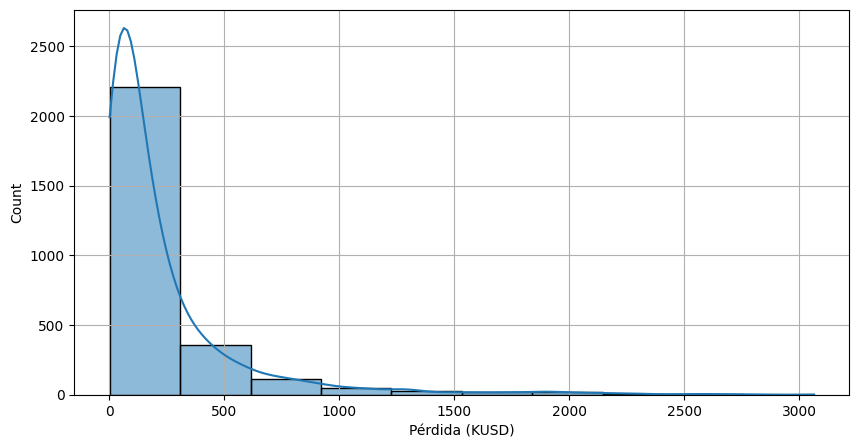

In [ ]:
nxl="/content/drive/MyDrive/integración de datos y prospectiva/1/1 RiesgoOperacional_EVERGREEEN.xlsx"
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

# Procedemos con la construcción de la distribución agregada de las pérdidas
Freq=XDB.iloc[:,3]
Sev=XDB.iloc[:,4]
LDA=Freq*Sev

# Se procede con la construcción de la distribución agregada
plt.figure(figsize=(10,5))
sns.histplot(LDA,bins=10,kde=True)
plt.xlabel("Pérdida (KUSD)")
plt.grid()
plt.show()

2. Se procede con la clusterización estadística. La clusterización estadística está definida por el histograma de frecuencias.

In [ ]:
np.set_printoptions(suppress=True)
NI = 10 # Indica el número de clusters
counts,bin_edges=np.histogram(LDA,bins=NI)
print("El número de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores:")
print(bin_edges[:-1])
print("Los intervalos superiores:")
print(bin_edges[1:])
XC=(bin_edges[:-1]+bin_edges[1:])/2

# Se configura la tabla de los datos
Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
df=pd.DataFrame(Tabla,columns=["LI","LS","XC","ND"])
df.head(10)

El número de datos por intervalo es:
[2209  356  116   46   27   18   20    7    4    1]
Los intervalos inferiores:
[   2.6   308.93  615.26  921.59 1227.92 1534.25 1840.58 2146.91 2453.24
 2759.57]
Los intervalos superiores:
[ 308.93  615.26  921.59 1227.92 1534.25 1840.58 2146.91 2453.24 2759.57
 3065.9 ]


,LI,LS,XC,ND
0,2.599197,308.929450,155.764324,2209.0
1,308.929450,615.259703,462.094577,356.0
2,615.259703,921.589957,768.424830,116.0
3,921.589957,1227.920210,1074.755083,46.0
4,1227.920210,1534.250463,1381.085337,27.0
5,1534.250463,1840.580717,1687.415590,18.0
6,1840.580717,2146.910970,1993.745843,20.0
7,2146.910970,2453.241223,2300.076097,7.0
8,2453.241223,2759.571476,2606.406350,4.0
9,2759.571476,3065.901730,2912.736603,1.0


3. Se calcula las métricas estadísticas de tendencia central y dispersión: Media, Desviación, Asimetría y Kurtosis.

In [ ]:
# La medida
u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)

T2=np.column_stack((u,var,sigma))
df2=pd.DataFrame(T2,columns=["Media","Varianza","Desviación"])
df2.head(1)

,Media,Varianza,Desviación
0,231.266602,115581.511672,339.97281


In [ ]:
from scipy.stats import skew, kurtosis

# Calcular skewness
lda_skew = skew(LDA)

# Calcular kurtosis
lda_kurtosis = kurtosis(LDA)

df2_temp = df2.copy()
df2_temp['Asimetría'] = lda_skew
df2_temp['Kurtosis'] = lda_kurtosis

display(df2_temp)

,Media,Varianza,Desviación,Asimetría,Kurtosis
0,231.266602,115581.511672,339.97281,3.389058,14.577132


**Analisis de resultados**
De las métricas de tendencia central y dispersión, podemos observar que los datos tienen la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetría (3.3890), el cual esta por encima de la unidad, lo que indica que en general las pérdidas por dejar contenedores en tierra son perdidas menores (perdidas esperadas-no asegurables). Por su parte el coeficiente de curtosis, muestra que los datos se encuentran muy concentrados al lado izquierdo de la media de la distribución de las pérdidas, tal y como se puede observar en la gráfica del histograma de frecuencias. Esto refuerza la idea de menores pérdidas.